In [0]:
# Fill in your name using the format below and student ID number
your_name = "Jacobsen, Anik"
student_id = "1519077"

In [0]:
# Before submission, set this to True so that you can render and verify this notebook without training deep learning models.
# Any deep learning models will be trained from file instead.
stop_training = True

In [0]:
# Uncomment the following line to run in Google Colab
!pip install --quiet openml 

In [4]:
# Uncomment the following line to run in Google Colab
%tensorflow_version 2.x
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU') # Check whether GPUs are available

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [0]:
%matplotlib inline
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [6]:
from packaging import version
import sklearn
import tensorflow
sklearn_version = sklearn.__version__
tensorflow_version = tensorflow.__version__
if version.parse(sklearn_version) < version.parse("0.22.0"):
    print("scikit-learn is outdated. Please update now!")
if version.parse(tensorflow_version) < version.parse("2.1.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.1.".format(tensorflow_version))
else:
    print("Hi{}, Looks good. You may continue :)".format(your_name.split(",")[1]))

Hi Anik, Looks good. You may continue :)


# Assignment 3

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Storing and submitting files
You must be able to store your models and submit them to GitHub Classroom. The evaluation functions used in this notebook will automatically store models for you.

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
* Fill in the path to your assignment folder below
  * It's likely '/content/drive/My Drive/assignment-3-yourname'

In [0]:
#base_dir = '/content/drive/My Drive/TestAssignment' # For Google Colab
base_dir = '/content/drive/My Drive/assignment-3-beyondata1'

In [8]:
#Uncomment to link Colab notebook to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed things up training quite a bit. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 3rd cell on the top of this notebook to check that the GPU is found.

Note that Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine.

### Constraints
* Your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are.
* When questions ask you to provide an explanation, it should be less than 500
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters" yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your model performs. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to run the verification script and check that all the results are included.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model.
* Be original. We will check for plagiarism between student submissions.

### Data
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build models that recognize the correct digit.

If you use Colab, uncomment the following to cache the dataset inside the VM. This will make reloading faster if you need to restart your notebook. After longer periods of inactivity, your VM may be recycled and the cache lost, in which case the dataset will be downloaded again. Also note that this dataset is about 1Gb large, and will take even more space in memory. You may need to switch to a high-RAM environment (Colab will ask you if you hit the limit).

In [0]:
# Use OpenML caching in Colab
# On your local machine, it will store data in a hidden folder '~/.openml'
import os
oml.config.cache_directory = os.path.expanduser('/content/cache')

In [0]:
# Download Streetview data. Takes a while (several minutes), and quite a bit of
# memory when it needs to download. After caching it loads faster.
SVHN = oml.datasets.get_dataset(41081)
X, y, _, _ = SVHN.get_data(dataset_format='array',
    target=SVHN.default_target_attribute)

Reshape, sample and split the data

In [0]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X),32,32,3))
Xr = Xr / 255.
yr = to_categorical(y)

In [0]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
evaluation_split = X_train, X_val, y_train, y_val

Check the formatting - and what the data looks like

(32, 32, 3)


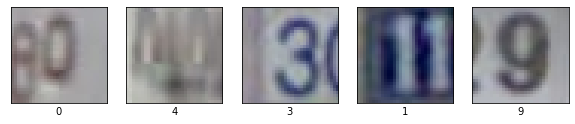

In [13]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    for n in range(len(X)):
        if grayscale:
            X[n] = np.reshape(X[n], (32,32))  # I added this so we can display greyscale images
            axes[n].imshow(X[n], cmap='gray', vmin=0, vmax=1) # I added the vmin=0, vmax=1
        else:
            axes[n].imshow(X[n])
        axes[n].set_xlabel((np.argmax(y[n])+1)%10) # Label is index+1
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)) for i in range(5)]
X_random = [X_train[i] for i in images]
print(X_random[0].shape)
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [0]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model # for use with tensorflow
from tensorflow.keras.models import model_from_json

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')

def load_model_from_file(base_dir, name, extension='.h5'):
  """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
  function following the Keras API. Don't change if you use TensorFlow. Otherwise,
  adapt as needed. 
  Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
  """
  try:
    # if a json description is available, load config and then weights
    if os.path.isfile(os.path.join(base_dir, name+'.json')):
      json_file = open(os.path.join(base_dir, name+'.json'), 'r')
      loaded_model_json = json_file.read()
      json_file.close()
      model = model_from_json(loaded_model_json)
      model.load_weights(os.path.join(base_dir, name+extension))
    # else just load the entire model from hdf5 file
    else:
      model = load_model(os.path.join(base_dir, name+extension))
  except OSError:
    shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
    return False
  return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
  """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
  adapt as needed. 
  Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
  """
  path = os.path.join(base_dir, name+extension)
  model.save(path)
  size = os.path.getsize(path)
  # If model > 100MB, store the weights and architecture only.
  if size > 100*1024*1024:
    print("Model larger than 100MB, storing weights only.")
    model.save_weights(path)
    model_json = model.to_json()
    with open(os.path.join(base_dir, name+".json"), "w") as json_file:
        json_file.write(model_json)

# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# DO NOT EDIT
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Training the model", verbose)
        if generator:
            generator, X_val, y_val = data
            history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                              steps_per_epoch=steps_per_epoch, verbose=1, 
                              validation_data=(X_val, y_val))
            learning_curves = history.history
        else:
            X_train, X_val, y_train, y_val = data
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              verbose=1, validation_data=(X_val, y_val))
            learning_curves = history.history
        shout("Saving to file", verbose)
        save_model_to_file(model, base_dir, name)
        with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
            pickle.dump(learning_curves, file_pi)
        shout("Model stored in "+base_dir, verbose)
    else: # Load from file
        shout("Loading model from file", verbose)
        model = load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return  # I changed this so we also display the results from training
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return  # I changed this so we also display the results from training
        shout("Success!", verbose)
    # Report
    print(model.summary())
    lc = pd.DataFrame(learning_curves)
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    print(lc.apply(minMax))

Loading model from file
Success!
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                30730     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 30,840
Trainable params: 30,840
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  2.233360  0.189900  2.233021      0.190974
max  2.246179  0.190954  2.233070      0.190974


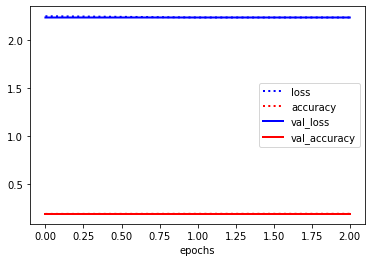

In [15]:
# Toy usage example
# Remove before submission
from tensorflow.keras import models
from tensorflow.keras import layers 

def build_toy_model():
    model = models.Sequential()
    model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# First build and store
run_evaluation("toy_example", build_toy_model, evaluation_split, base_dir, 
               train=True, epochs=3, batch_size=32)

Loading model from file
Success!
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                30730     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 30,840
Trainable params: 30,840
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  2.233360  0.189900  2.233021      0.190974
max  2.246179  0.190954  2.233070      0.190974


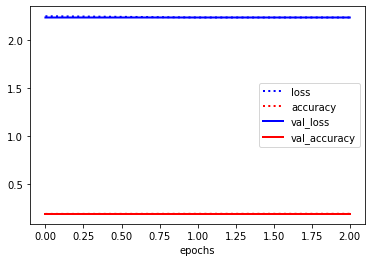

In [16]:
# Toy usage example
# Remove before submission
# With train=False: load from file and report the same results without rerunning
run_evaluation("toy_example", build_toy_model, evaluation_split, base_dir, 
               train=False)

In [0]:
# My function to evaluate the model on the test data.
def evaluate_on_test_data(model_name, X_test, y_test):
  model = load_model_from_file(base_dir, model_name)
  result = model.evaluate(X_test, y_test)
  print("EVALUTAION ON TEST DATA  --  Loss: {:.4f}, Accuracy:  {:.4f}".format(*result))

## Part 1. Dense networks (10 points)

### Question 1.1: Baseline model (4 points)
- Build a dense network (with only dense layers) of at least 3 layers that is shaped like a pyramid: The first layer must have many nodes, and every subsequent layer must have increasingly fewer nodes, e.g. half as many. Implement a function 'build_model_1_1' that returns this model.
- You can explore different settings, but don't use any preprocessing or regularization yet. You should be able to achieve at least 70% accuracy, but more is of course better. Unless otherwise stated, you can use accuracy as the evaluation metric in all questions.
* Add a small description of your design choices (max. 500 characters) in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function. For this question, you should not use more than 50 epochs.

Loading model from file
Success!
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_8 (Reshape)          (None, 3072)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 3072)              9440256   
_________________________________________________________________
dense_43 (Dense)             (None, 768)               2360064   
_________________________________________________________________
dense_44 (Dense)             (None, 384)               295296    
_________________________________________________________________
dense_45 (Dense)             (None, 192)               73920     
_________________________________________________________________
dense_46 (Dense)             (None, 10)                1930      
Total params: 12,171,466
Trainable params: 12,171,466
Non-trainable params: 0
________

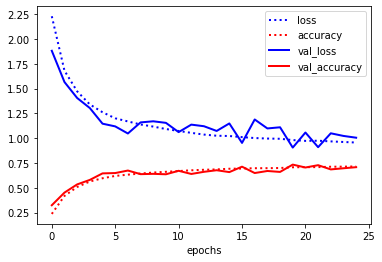

In [18]:
def build_model_1_1():

  model = models.Sequential()

  model.add(layers.Reshape((3072,), input_shape=(32,32,3)))

  model.add(layers.Dense(3072, activation='relu'))
  model.add(layers.Dense(768, activation='relu'))
  model.add(layers.Dense(384, activation='relu'))
  model.add(layers.Dense(192, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
    
  model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  
  return model

run_evaluation("model_1_1", build_model_1_1, evaluation_split, base_dir, 
               train=False, epochs=25, batch_size=64)

evaluate_on_test_data('model_1_1', X_test, y_test)

answer_q_1_1 = """
               Layer 1 has the same number of neurons as values in the image.
               To condense the information with the NN, the 3 subsequent layers consist of fewer neurons (768,384,192).
               Relu was chosen as an inexpensive activation function.
               The last layer consists of 10 neurons, with a softmax activation function to obtain a probability for each class.
               The model achieves a val_acc of 0.73 and test_acc of ca 0.7.
               """
print("Answer is {} characters long".format(len(answer_q_1_1)))

### Question 1.2: Preprocessing (2 points)
Rerun the model, but now preprocess the data first by converting the images to 
greyscale. You can use the helper function below. If you want to do additional 
preprocessing, you can do that here, too.
* Store the preprocessed data as a tuple `preprocessed_split`
* Rerun and re-evaluate your model using the preprocessed data.
  * For the remainder of the assignment, always use the preprocessed data
* Explain what you did and interpret the results in 'answer_q_1_2'. Is the model
  better, if so, why?

In [0]:
# Luminance-preserving RGB to greyscale conversion
def rgb2gray(X):
    return np.expand_dims(np.dot(X, [0.2990, 0.5870, 0.1140]), axis=3)

In [0]:
def preprocess(X_train, X_val): 
    X_train_g = rgb2gray(X_train) 
    X_val_g = rgb2gray(X_val) 
    return X_train_g, X_val_g

X_train_g, X_val_g = preprocess(X_train, X_val)

# Replace with the preprocessed data
preprocessed_split = X_train_g, X_val_g, y_train, y_val

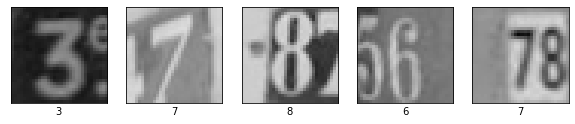

In [21]:
# Inspecting preprocessed images
images = [randint(0,len(X_train_g)) for i in range(5)]
X_random = [X_train_g[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random, grayscale=True)

Loading model from file
Success!
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_12 (Reshape)         (None, 1024)              0         
_________________________________________________________________
dense_53 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_54 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_55 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_56 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_57 (Dense)             (None, 10)                650       
Total params: 1,353,802
Trainable params: 1,353,802
Non-trainable params: 0
__________

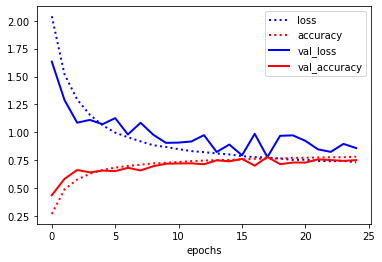

In [22]:
# Adjusted model
def build_model_1_2():
  n_layer1 = 1024
  n_layer2 = 1024/4
  n_layer3 = 1024/8
  n_layer4 = 1024/16

  model = models.Sequential()

  model.add(layers.Reshape((1024,), input_shape=(32,32,1)))

  model.add(layers.Dense(n_layer1, activation='relu'))
  model.add(layers.Dense(n_layer2, activation='relu'))
  model.add(layers.Dense(n_layer3, activation='relu'))
  model.add(layers.Dense(n_layer4, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
    
  model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  
  return model
  #pass

# Evaluate. Use a new name 'model_1_2' to not overwrite the previous trained model
run_evaluation("model_1_2", build_model_1_2, preprocessed_split, base_dir, 
               train=False, epochs=25, batch_size=64)

evaluate_on_test_data('model_1_2', rgb2gray(X_test), y_test)

answer_q_1_2 = """
               The model has the same architecture as before, but since we have a grey image, the input size is smaller (1024).
               The size of the subsequent layers is also divided by 3.
               The model performs better, achieving a val_acc of 0.78 and a test_acc of 0.75.
               For classification, the colors of the image are not important.
               By preprocessing, the task is simplified, so the model can focus on learning the number's shapes.
               """
print("Answer is {} characters long".format(len(answer_q_1_2)))

### Question 1.3: Regularization and tuning (4 points)
* Regularize the model. You can explore (and combine) different techniques. What works best?
* Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
* Explain your findings and final design decisions. Retrain the model again on the preprocessed data and discuss the results.
* Return your model in function 'build_model_1_3' and write your answer in 'answer_q_1_3'

Loading model from file
Success!
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_20 (Reshape)         (None, 1024)              0         
_________________________________________________________________
dense_93 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_94 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_95 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_96 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_97 (Dense)    

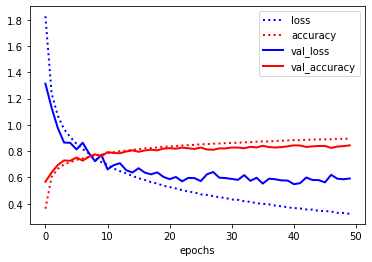

In [23]:
def build_model_1_3():

    n_layer1 = 1024
    n_layer2 = 1024/4
    n_layer3 = 1024/8
    n_layer4 = 1024/16

    model = models.Sequential()
    model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
    model.add(layers.Dense(n_layer1, activation='relu'))
    model.add(layers.Dense(n_layer2, activation='relu'))
    model.add(layers.Dense(n_layer3, activation='relu'))
    model.add(layers.Dense(n_layer4, activation='relu')) 
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(10, activation='softmax'))

    #adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=True)

    sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

    model.compile(optimizer=sgd,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

  # pass
run_evaluation("model_1_3", build_model_1_3, preprocessed_split, base_dir, 
               train=False, epochs=50, batch_size=64)

evaluate_on_test_data('model_1_3', rgb2gray(X_test), y_test)

answer_q_1_3 = """
               We use the same architecture as before, adding a dropout layer (0.2) between the last two layers, helping to prevent overfitting.
               SGD with Nesterov momentum, to adapt the learning rate, is used as an activation function. 
               The model is trained for 50 epochs since it does not seem to start overfitting. 
               The model outperforms the model before, achieving a val_acc and test_acc of 0.84.
               """
print("Answer is {} characters long".format(len(answer_q_1_3)))

## Part 2. Convolutional neural networks (10 points)
### Question 2.1: Design a ConvNet (7 points)
- Build a sequential convolutional neural network. Try to achieve the best validation accuracy you can. You should be able to get at least 90% accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. 
- Add a description of your design choices in 'answer_q_2_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- You are allowed **800** characters for this answer (but don’t ramble).
- The name of the model should be 'model_2_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data.

Loading model from file
Success!
Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_58 (Conv2D)  

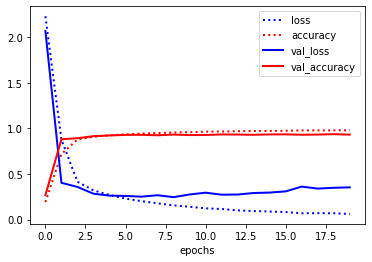

In [24]:
def build_model_2_1():

    #input_shape = (32,32,1)
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 1)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    sgd = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
    # adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True)

    model.compile(optimizer=sgd,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

  # pass
run_evaluation("model_2_1", build_model_2_1, preprocessed_split, base_dir, 
               train=False, epochs=20, batch_size=64)

evaluate_on_test_data('model_2_1', rgb2gray(X_test), y_test)

answer_q_2_1 = """
               The model consists of 3 conv blocks with 2 conv layers of the same size each.
               Each conv layer uses a 3x3 kernel size and padding is applied to produce an output with the same dimensions.
               Between each conv block, max pooling is used to reduce the resolution and increase translational invariance.
               The number of filters increases with the depth of the network to preserve the information as the resolution decreases.
               The 2 dense layers enable for feature interaction, dropout is applied in between to allow for generalization. 
               The final dense layer outputs a probability for each class.

               The model outperforms the fully connected models with a val_acc and test_acc of 0.93. 
               """
print("Answer is {} characters long".format(len(answer_q_2_1)))

### Question 2.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not?
- Evaluate the model from question 2.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_2_2'.
- Add a description of your design choices in 'answer_q_2_2': explain what you did and also why. Also discuss the performance of the model.

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, rotation_range=10, zoom_range=0.2, fill_mode= "nearest")

flow = image_gen.flow(X_train_g, y_train, batch_size=64)

augmented_split = flow, X_val_g, y_val

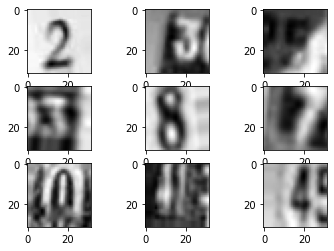

In [26]:
# inspecting
img_rows, img_cols = 32, 32

for X_batch, y_batch in image_gen.flow(X_train_g, y_train, batch_size=9):
    # Show 9 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(img_rows, img_cols), cmap='gray')
    # show the plot
    plt.show()
    break

Loading model from file
Success!
Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_78 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_82 (Conv2D)  

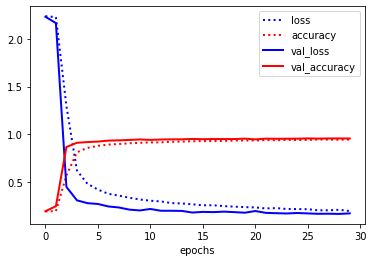

In [27]:
# Note that we build the same untrained model as in question 2.1 but store the 
# trained version as model_2_2. Change attributes as needed to run on augmented
# data

steps = int(X_train.shape[0] / 64)

run_evaluation("model_2_2", build_model_2_1, augmented_split, base_dir, 
               train=False, epochs=30, batch_size=64, generator = True, steps_per_epoch=steps)

evaluate_on_test_data('model_2_2', rgb2gray(X_test), y_test)

answer_q_2_2 = """
               Small width and height shift, small rotation and zoom transformations were applied to the images.
               Other techniques such as flips, result in non-numbers. 

               The model generalizes better from the training data, new images each step prevents the model from overfitting.
               More epochs are needed to achieve increased performance.

               The model achieves a val_acc and test_acc of 0.95.
               """
print("Answer is {} characters long".format(len(answer_q_2_2)))

## Part 3. Model interpretation (10 points)
### Question 3.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_2_2) by evaluating it on the test data. You do not need to retrain the model.
* What is the accuracy of model_2_2 on the test data? Store this in 'test_accuracy_3_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Visualize the misclassifications in more depth by focusing on a single
class (e.g. the number '2') and analyse which kinds of mistakes are made for that class. For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'.
* Summarize your findings in 'answer_q_3_1'

In [0]:
# interactive focus class slider
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

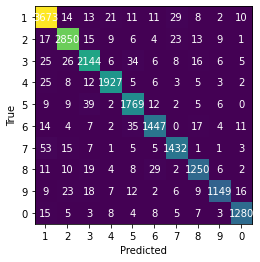

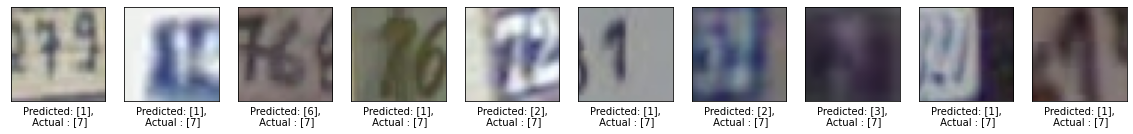

interactive(children=(IntSlider(value=0, description='focus_class', max=9), Output()), _dom_classes=('widget-i…

Answer is 487 characters long


In [29]:
from sklearn.metrics import confusion_matrix

model = load_model_from_file(base_dir, 'model_2_2')  # Loading the model
'''result = model.evaluate(rgb2gray(X_test), y_test)  # Evaluating on test data

test_accuracy_3_1 = result[1]'''


y_pred = model.predict(rgb2gray(X_test))

def plot_confusion_matrix():
  cm = confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
  fig, ax = plt.subplots()
  im = ax.imshow(cm)
  ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
  # ax.set_xticklabels(list(range(10)))
  # ax.set_yticklabels(list(range(10)))
  ax.set_xticklabels([1,2,3,4,5,6,7,8,9,0])
  ax.set_yticklabels([1,2,3,4,5,6,7,8,9,0])
  ax.set_ylabel('True')
  ax.set_xlabel('Predicted')
  for i in range(100):
      ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")
  # pass

def plot_misclassifications(focus_class = 7):
  # getting the missclassifed samples for the class we want to focus on
  misclassified_samples = np.nonzero((np.argmax(y_test, axis=1) != np.argmax(y_pred, axis=1)) & ((np.argmax(y_test, axis=1)+1)%10 == focus_class))[0]

  fig, axes = plt.subplots(1, 10,  figsize=(20, 10))
  for nr, i in enumerate(misclassified_samples[:10]):
    axes[nr].imshow(X_test[i])
    axes[nr].set_xlabel("Predicted: %s,\n Actual : %s" % ([(np.argmax(y_pred[i])+1)%10],[(np.argmax(y_test[i])+1)%10]))
    axes[nr].set_xticks(()), axes[nr].set_yticks(())

  plt.show();


plot_confusion_matrix()

plot_misclassifications()

interact(plot_misclassifications, focus_class = widgets.IntSlider(min=0, max=9, step=1))

answer_q_3_1 = """
               From the confusion matrix, we can see that the network often mistakes class 7+1, 3+5, 6+5 and 3+5 (more than 30 misclassifications). 
               These numbers have similar features.

               Focusing on class 7 shows that many of the misclassified images are handwritten digits, look similar to a 1, or
               are next to another number which is detected. A few images are too blurry. 

               Other numbers have similar issues.
               """
print("Answer is {} characters long".format(len(answer_q_3_1)))

### Question 3.2: Visualizing activations (4 points)
* Implement a function `plot_activations()` that returns the most interesting activations (feature maps). Select the first example from the test set. Retrieve and visualize the activations of model 2_2 for that example (make sure you load that model in the function), for every filter for different convolutional layers (at different depths in the network).
* Give an explanation (as detailed as you can) about your observations in 'answer_q_3_2'. Is your model indeed learning something useful?

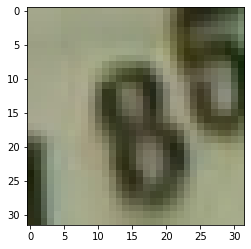

In [30]:
plt.imshow(X_test[0])

In [31]:
first_image = rgb2gray(X_test)[0]
first_image = np.expand_dims(first_image, axis=0) 

images_per_row = 16
layer_names = []
for layer in model.layers:
  layer_names.append(layer.name)

model = load_model_from_file(base_dir, "model_2_2")

def plot_activations(image = first_image, model = model, layer_index=0):
  
  layer_outputs = [layer.output for layer in model.layers] 
  activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
  activations = activation_model.predict(np.reshape(first_image, (1,32,32,1)))
  
  start = layer_index
  end = layer_index+1
  
  # Now let's display our feature maps
  for layer_name, layer_activation in zip(layer_names[start:end], activations[start:end]):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]
    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
      for row in range(images_per_row):
        channel_image = layer_activation[0,:, :, col * images_per_row + row]
        # Post-process the feature to make it visually palatable
        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *= 64
        channel_image += 128
        channel_image = np.clip(channel_image, 0, 255).astype('uint8')
        display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title("Activation of layer {} ({})".format(layer_index+1,layer_name))
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

  plt.show()

  # pass
  
answer_q_3_2 = """
               Most of the feature maps show activations, others are blank.
               The second feature map shows a slightly transformed image (shifted/rotated).
               The number in the image is an 8, some of the feature maps show the outline, highlighting specific edges (especially round ones).
               Some activation for number 5 is shown as well, which is also in the image.

               The features become more abstract with the depth of the network.
               """
print("Answer is {} characters long".format(len(answer_q_3_2)))

Answer is 499 characters long


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


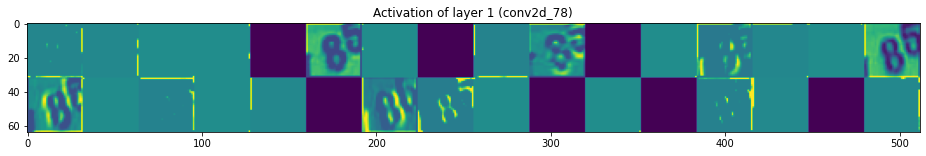

In [32]:
plot_activations(first_image, model, layer_index = 0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


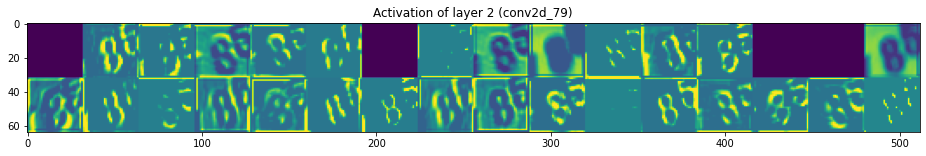

In [33]:
plot_activations(first_image, model, layer_index = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


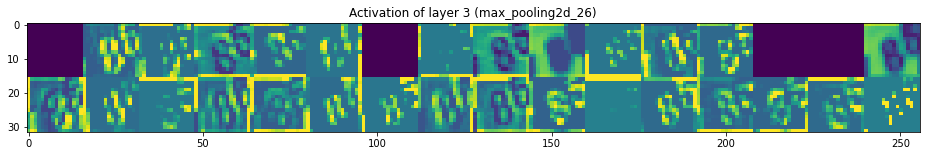

In [34]:
plot_activations(first_image, model, layer_index = 2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


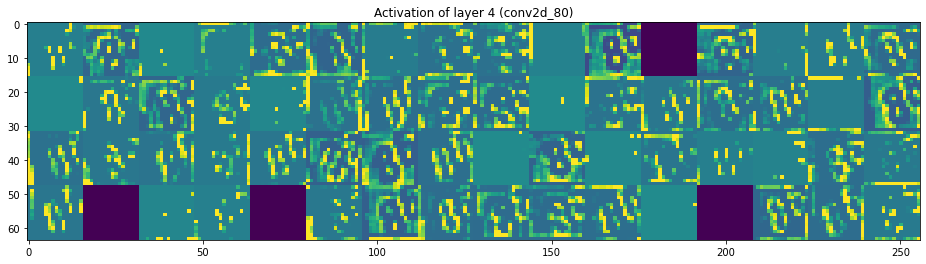

In [35]:
plot_activations(first_image, model, layer_index = 3)

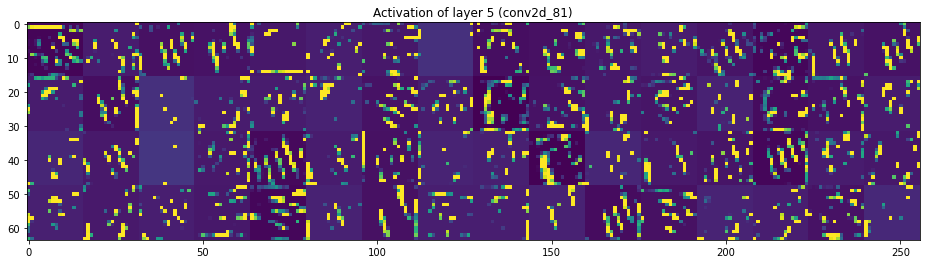

In [36]:
plot_activations(first_image, model, layer_index = 4)

In [37]:
interact(plot_activations, image =fixed(first_image), model=fixed(model), layer_index = widgets.IntSlider(min=0, max=6, step=1))


interactive(children=(IntSlider(value=0, description='layer_index', max=6), Output()), _dom_classes=('widget-i…

<function __main__.plot_activations>

### Question 3.3: Visualizing activations (4 points)
* Again, select the first example from the test set, and the trained model_2_2.
* Implement a function `plot_activation_map()` that builds and shows a class activation map for your last convolutional layer that highlights what the model is paying attention to when classifying the example.
* If possible, superimpossible the activation map over the image. If not, plot
them side by side. Implement a function 'plot_3_3' that returns the entire plot.

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


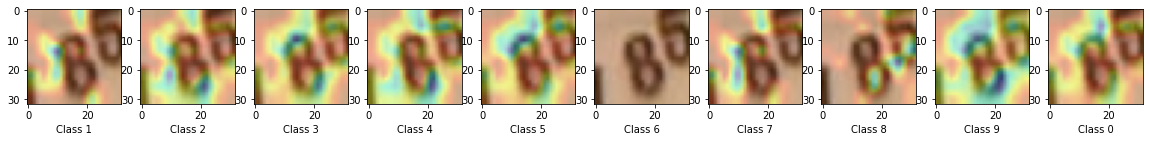

In [38]:
import cv2
from keras import backend as K

def plot_3_3():

  first_image = rgb2gray(X_test)[0]
  first_image = np.expand_dims(first_image, axis=0) 

  model = load_model_from_file(base_dir, "model_2_2")

  fig, axes = plt.subplots(1, 10,  figsize=(20, 10))

  for c in range(10): 
    class_eight_output = model.output[:, c]

    last_conv_layer = model.get_layer(index=6)
    grads = K.gradients(class_eight_output, last_conv_layer.output)[0]

    pooled_grads = K.mean(grads, axis=(0, 1, 2))

    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

    pooled_grads_value, conv_layer_output_value = iterate([first_image])

    for i in range(128):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    # We resize the heatmap to have the same size as the original image
    heatmap = cv2.resize(heatmap, (32, 32))

    # image to heatmap shape for open cv 
    first_image_cv = X_test[0].reshape((32,32,3))

    # We convert the heatmap to RGB
    heatmap = np.uint8(255*heatmap)

    # We apply the heatmap to the original image
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    heatmap = heatmap / 255

    # 0.3 here is a heatmap intensity factor
    superimposed_img = 1 * first_image_cv + 0.3 * heatmap
    axes[c].imshow(superimposed_img)
    axes[c].set_xlabel('Class {}'.format((c+1)%10))
  
  plt.show(block=False)

plot_3_3()

## Part 4. Transfer learning (10 points)
### Question 4.1 Fast feature extraction with VGG16 (5 points)
- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_4_1` that adds a dense layer to the convolutional base, and freezes the convolutional base. Consider unfreezing the last few convolutional layers and evaluate whether that works better.
- Train the resulting model on the *original* (colored) training data
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_1'.

Loading model from file
Success!
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 10)                2570      
Total params: 14,848,586
Trainable params: 14,588,426
Non-trainable params: 260,160
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  0.106959  0

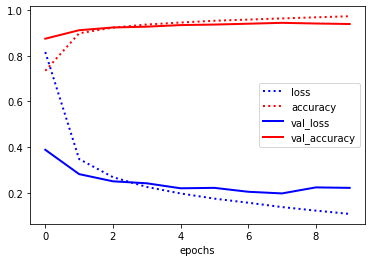

In [39]:
from tensorflow.keras.applications.vgg16 import VGG16

def build_model_4_1():
  # set if you want to train the convolutional base
  train_base=True

  conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

  # unfreezing last convolutional layers
  if train_base:
    conv_base.trainable = True
    set_trainable = False

    for layer in conv_base.layers:
      if layer.name == 'block3_conv1':
          set_trainable = True
      if set_trainable:
          layer.trainable = True
      else:
          layer.trainable = False

  else:
    conv_base.trainable = False

  # print(conv_base.summary())

  model = models.Sequential()
  model.add(conv_base)
  model.add(layers.Flatten())
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(10, activation='sigmoid'))

  # print(model.summary())

  sgd = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

  model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
  
  return model

run_evaluation("model_4_1", build_model_4_1, evaluation_split, base_dir, 
               train=False, epochs=10, batch_size=64)

# evaluate_on_test_data('model_4_1', X_test, y_test)
# does not work anyome because I changed the save and load file. Before it was 0.94


answer_q_4_1 = """
               Two dense layers are added to the VGG 16 architecture for classification. 
               A small learning rate is applied to only fine tune the weights. 
               Not unfreezing yield a poor performance (0.83 acc). 
               The more blocks were unfrozen, the higher the accurcay.
               This final network unfreezes the last 3 conv blocks and uses a small learning rate.
               It reaches a val_acc and test_acc of around 0.94.
               """
print("Answer is {} characters long".format(len(answer_q_4_1)))

### Question 4.2 Embeddings and pipelines (5 points)
- Generate embeddings of the original images by running them through the trained convolutional part of model_4_1 (without the dense layer) and returning the output. Embed the training and test data and store them to disk using the helper functions below. Implement a function `store_embeddings` that loads model_4_1 and stores all necessary embeddings to file. Make sure to run it once so that the embeddings are stored (and submitted).
- Implement a function 'generate_pipeline' that returns an scikit-learn pipeline. You can use any non-deep learning technique (eg. SVMs, RFs,...), and preprocessing technique. You can do model selection using the validation set. 
- Implement a function 'evaluate_pipeline' that evaluates a given pipeline on a given training and test set. 
- Implement a function 'evaluation_4_2' that evaluates your pipeline on the embedded training and test set (loaded from file) and returns the accuracy. 
- Describe what you did and what you observed. Report the obtained accuracy score. Can you beat your best model thus far?

In [40]:
# Heatmap function from prev. assignment

import seaborn as sns
import pandas as pd

def heatmap(columns, rows, scores):
    """ Simple heatmap.
    Keyword arguments:
    columns -- list of options in the columns
    rows -- list of options in the rows
    scores -- numpy array of scores
    """
    df = pd.DataFrame(scores, index=rows, columns=columns)
    sns.heatmap(df, cmap='RdYlGn_r', linewidths=0.5, annot=True, fmt=".3f")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Pipeline: Pipeline(memory=None,
         steps=[('scaler', Normalizer(copy=True, norm='l2')),
                ('classifier',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
SVC: 0.946621009165072
----------------------
Pipeline: Pipeline(memory=None,
         steps=[('scaler', Normalizer(copy=True, norm='l2')),
                ('classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                     

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression: 0.9458656460872192
----------------------
Answer is 445 characters long


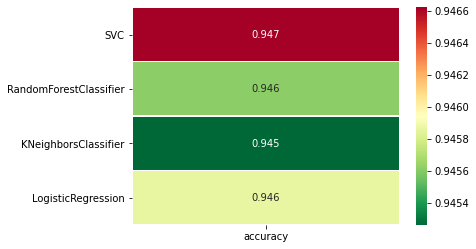

In [41]:
import pickle
import gzip
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

model = load_model_from_file(base_dir, "model_4_1")

def store_embedding(X, name):  
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'wb') as file_pi:
    pickle.dump(X, file_pi)

def load_embedding(name):
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'rb') as file_pi:
    return pickle.load(file_pi)

def store_embeddings(model = model):
  """ Stores all necessary embeddings to file
  """
  last_layer = model.get_layer(index=1)
  activation_model = models.Model(inputs=model.input, outputs=last_layer.output)
  X_train_emb = activation_model.predict(X_train_all)
  X_test_emb = activation_model.predict(X_test)
  for name, emb in {"X_train":X_train_emb, "X_test":X_test_emb}.items(): 
     store_embedding(emb, name)


def generate_pipeline(clf = SVC(random_state=1)):
  """ Returns an sklearn pipeline.
  """
  pipe = Pipeline(steps=[('scaler', Normalizer()),
                         ('classifier', clf)])
  
  print("Pipeline:",pipe)

  return pipe


def evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test):
  """ Evaluates the given pipeline, trained on the given embedded training set and 
      evaluated on the supplied embedded test set. Returns the accuracy score.
  """
  fit = pipeline.fit(X_train,y_train)
  pred = pipeline.predict(X_test) 
  acc = accuracy_score(y_test, pred)

  # print("Accuracy score is : {}".format(acc))
  return acc


def evaluation_4_2(X_train, y_train, X_test, y_test):
  """ Runs 'evaluate_pipeline' with embedded versions of the input data 
      and returns the accuracy.
  """

  # load embeddings
  X_train = load_embedding('X_train')
  X_test = load_embedding('X_test')

  # making the target variable categorical
  y_train_all_cat = np.argmax(y_train_all, axis =1)
  y_test_cat = np.argmax(y_test, axis =1)

  # initialize classifiers
  classifiers = [SVC(random_state=1), RandomForestClassifier(random_state=1), KNeighborsClassifier(n_neighbors=10),
                 LogisticRegression(random_state=1)]
  clfs_name = [type(clf).__name__ for clf in classifiers]

  scores = np.zeros((len(clfs_name), 1))
  # run the ML models
  for i, clf in enumerate(classifiers):
    pipe = generate_pipeline(clf)
    score = evaluate_pipeline(pipe, X_train, y_train_all_cat, X_test, y_test_cat)
    scores[i,0] = score
    print(str(clfs_name[i]) + ': {}'.format(score))
    print("----------------------")

  heatmap(['accuracy'], clfs_name, scores)


# make embeddings
store_embeddings(model)

evaluation_4_2(X_train_all, y_train_all, X_test, y_test)

answer_q_4_2 = """
               The output from the flatten layer is saved as embeddings. 
               4 Models are applied: SVC, RF, KNN and Logistic Regression.
               The first 3 models allow for non linear dependencies, unlike the NN. The last model was chosen as a comparison.
               The train_all set is used for training. 
               All 3 models perform about the same (~0.946), very similar performance to the NN.
               """

#print("Pipeline:",generate_pipeline())
print("Answer is {} characters long".format(len(answer_q_4_2)))